# 1. 필요 라이브러리 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 로드하기

In [3]:
# train 데이터
df = pd.read_csv('/content/drive/MyDrive/data/3-7/train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/data/3-7/test.csv')
df_test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [ ]:
df.shape

(42100, 19)

* 총 42100개의 데이터, 19개 컬럼

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

* 결측값 없는 것으로 보임.
* 변수 설명
    * no_of_adults : 성인 수
    * no_of_children : 어린이 수
    * no_of_weekend_nights : 숙박 수 (주말)
    * no_of_week_nights : 숙박 수 (평일)
    * type_of_meal_plan : 식사 유형
    * required_car_parking_space : 주차 공간 필요 여부(0 - 필요 없음, 1 - 필요 있음)
    * room_type_served : 예약한 객실 유형
    * lead_time : 예약 날짜와 입실 날짜 차이
    * arrival_year : 도착 날짜의 연도
    * arrival_month : 도착 날짜의 월
    * arrival_date : 도착 날짜
    * market_segment_type : ?
    * repeated_guest : 재방문 여부(0 - 재방문 X , 1 - 재방문 O)
    * no_of_previous_cancellations : 전에 취소한 예약 수
    * no_of_previous_bookings_not_canceled : 전에 취소하지 않은 예약 수
    * avg_price_per_room : 당일 평균 가격 예약(유동적, 단위 - 유로)
    * no_of_special_requests : 고객이 요청한 특별 요청 수(ex - 높은 층, 객실에서 보이는 전망 등)
    * booking_status : 예약 취소 여부(0 - 예약 취소 x / 1 - 예약 취소 o 

# 3. 변수 별 분석하기

## booking_status(target)

In [ ]:
df['booking_status'].value_counts()

0    25596
1    16504
Name: booking_status, dtype: int64

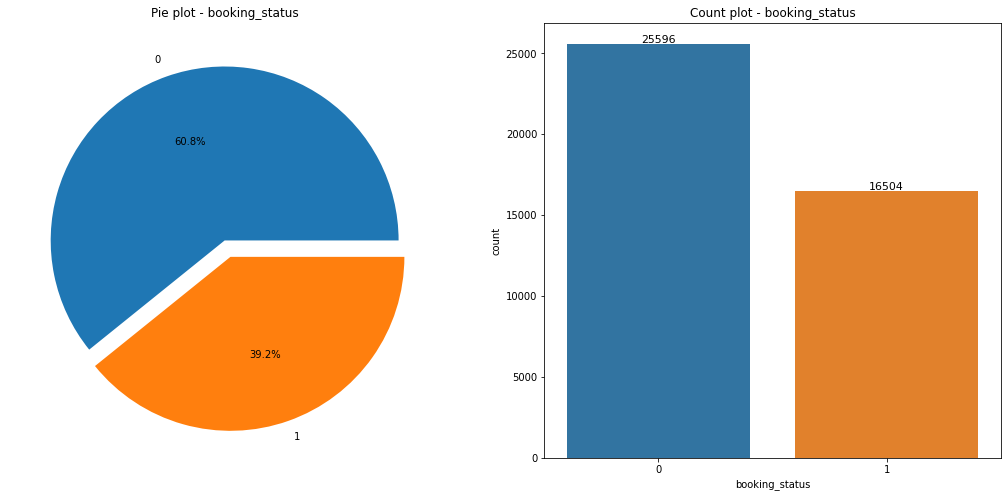

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))


df['booking_status'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('Pie plot - booking_status')
ax[0].set_ylabel('')

ax[1].set_title('Count plot - booking_status')
ax = sns.countplot(data = df, x = 'booking_status', ax = ax[1])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 11)

plt.show()

* 예약 취소를 하지 않은 팀이 42100팀 중에 25596팀으로 60.8%이다.
* 예약 취소를 한 팀이 42100팀 중에 16504팀으로 39.2%이다.

## value_counts()로 데이터 살펴보기

In [25]:
df['no_of_adults'].value_counts().sort_index()

0      167
1     7089
2    30771
3     4061
4       12
Name: no_of_adults, dtype: int64

* 어른 수는 0 ~ 4명으로 구성되어 있다.
* 대부분 어른 수는 2명이다.

In [26]:
df['no_of_children'].value_counts().sort_index()

0    37786
1     2729
2     1561
3       17
4        5
9        2
Name: no_of_children, dtype: int64

* 어린이 수는 0 ~ 9명으로 구성되어 있다.
* 대부분 어린이 수는 0명이다.

In [27]:
df['no_of_weekend_nights'].value_counts().sort_index()

0    18137
1    11389
2    12143
3      239
4      128
5       46
6       17
7        1
Name: no_of_weekend_nights, dtype: int64

* 주말 숙박 수가 7번이면 호텔에 3주 묵은 것인가??

In [28]:
df['no_of_week_nights'].value_counts().sort_index()

0      1937
1      9558
2     12905
3     10286
4      4175
5      2573
6       237
7       160
8        84
9        53
10       82
11       16
12        9
13        5
14        3
15       11
16        4
17        2
Name: no_of_week_nights, dtype: int64

* 평일 숙박 수가 17번이면 3주 묵은 것인가?
    * 데이터 내 최대로 숙박을 오래한 사람은 3주 정도

In [29]:
df['type_of_meal_plan'].value_counts().sort_index()

0    35463
1     3210
2     3421
3        6
Name: type_of_meal_plan, dtype: int64

* 식사 유형은 총 4가지가 있다. 어떤 기준으로 분류된건지는 알 수 없음.

In [30]:
df['required_car_parking_space'].value_counts().sort_index()

0    41037
1     1063
Name: required_car_parking_space, dtype: int64

* 주차공간을 필요로 하지 않는 사람이 더 많다. 

In [31]:
df['room_type_reserved'].value_counts().sort_index()

0    29853
1     9135
2     1131
3     1465
4      320
5      190
6        6
Name: room_type_reserved, dtype: int64

In [18]:
df['lead_time'].value_counts().sort_index()

0      827
1      846
2      502
3      480
4      463
      ... 
381      7
386     62
418     49
433     13
443     24
Name: lead_time, Length: 338, dtype: int64

* 0은 당일 예약, 443은 1년 이상 전에 예약

In [19]:
df['arrival_year'].value_counts().sort_index()

2017     6050
2018    36050
Name: arrival_year, dtype: int64

* 2017,2018년 데이터

In [20]:
df['arrival_month'].value_counts().sort_index()

1      805
2     1201
3     2201
4     3006
5     3292
6     3356
7     4681
8     5763
9     5148
10    6453
11    2803
12    3391
Name: arrival_month, dtype: int64

In [21]:
df['arrival_date'].value_counts().sort_index()

1     1428
2     1408
3     1280
4     1438
5     1367
6     1426
7     1206
8     1412
9     1424
10    1253
11    1278
12    1339
13    1479
14    1164
15    1376
16    1600
17    1426
18    1291
19    1333
20    1437
21    1326
22    1274
23    1342
24    1218
25    1447
26    1460
27    1633
28    1398
29    1392
30    1538
31     707
Name: arrival_date, dtype: int64

In [22]:
df['market_segment_type'].value_counts().sort_index()

0    14306
1    25885
2     1384
3       83
4      442
Name: market_segment_type, dtype: int64

* 무슨 변수인지 알 수 없음...

In [23]:
df['repeated_guest'].value_counts().sort_index()

0    40871
1     1229
Name: repeated_guest, dtype: int64

* 재방문한 고객은 1229명이다.

In [24]:
df['no_of_previous_cancellations'].value_counts().sort_index()

0     41755
1       195
2        53
3        51
4        15
5         3
6         2
8         1
11       22
13        3
Name: no_of_previous_cancellations, dtype: int64

* 대부분 이전에 취소한 적이 없지만 최대 13번 취소한 내역이 있는 사람이 있다.

## 0

In [ ]:
pd.crosstab(df['no_of_adults'], df['booking_status'], margins = True)

booking_status,0,1,All
no_of_adults,,,
0,107,60,167
1,5089,2000,7089
2,17993,12778,30771
3,2401,1660,4061
4,6,6,12
All,25596,16504,42100


In [ ]:
pd.crosstab(df['no_of_adults'], df['booking_status'], normalize = 'index') # columns로도 해보기?

booking_status,0,1
no_of_adults,,
0,0.640719,0.359281
1,0.717873,0.282127
2,0.584739,0.415261
3,0.591234,0.408766
4,0.500000,0.500000


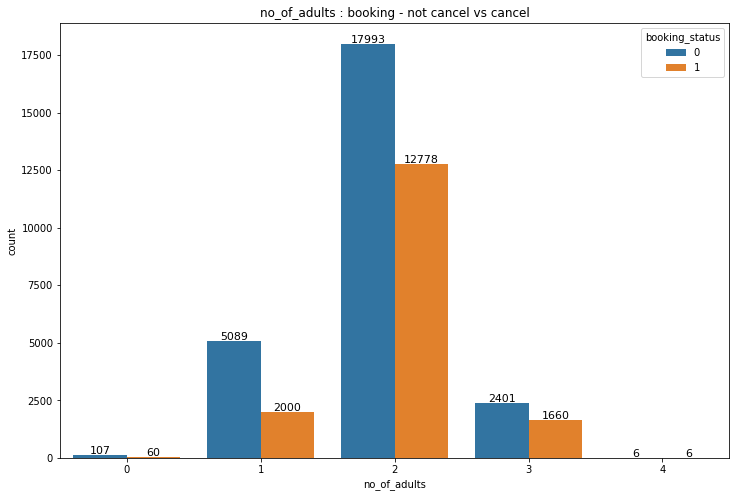

In [ ]:
plt.figure(figsize =(12,8))

ax = sns.countplot(data = df, x = 'no_of_adults', hue = 'booking_status')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 11)
plt.title('no_of_adults : booking - not cancel vs cancel')
plt.show()

* 어른 수가 2명인 경우가 가장 많았다.
* 어른 수가 4명인 경우는 12팀이었고 예약 취소 여부는 반반 이었다.

In [ ]:
df['no_of_children'].value_counts().sort_index()

0    37786
1     2729
2     1561
3       17
4        5
9        2
Name: no_of_children, dtype: int64

In [ ]:
pd.crosstab(df['no_of_children'], df['booking_status'], margins = True)

booking_status,0,1,All
no_of_children,,,
0,22990,14796,37786
1,1675,1054,2729
2,912,649,1561
3,13,4,17
4,4,1,5
9,2,0,2
All,25596,16504,42100


In [ ]:
pd.crosstab(df['no_of_children'], df['booking_status'], normalize = 'index')

booking_status,0,1
no_of_children,,
0,0.608426,0.391574
1,0.613778,0.386222
2,0.584241,0.415759
3,0.764706,0.235294
4,0.800000,0.200000
9,1.000000,0.000000


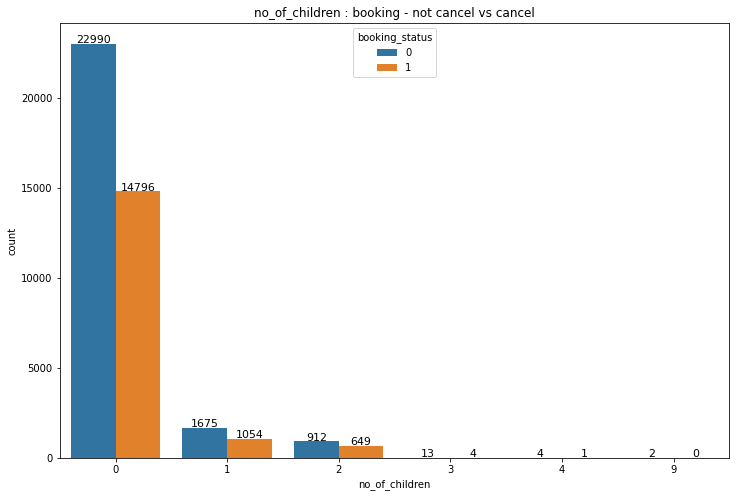

In [ ]:
plt.figure(figsize =(12,8))

ax = sns.countplot(data = df, x = 'no_of_children', hue = 'booking_status')
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    else:
        height = int(height)

    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 11)
plt.title('no_of_children : booking - not cancel vs cancel')
plt.show()

In [ ]:
df['no_of_weekend_nights'].value_counts().sort_index()

0    18137
1    11389
2    12143
3      239
4      128
5       46
6       17
7        1
Name: no_of_weekend_nights, dtype: int64

In [ ]:
pd.crosstab(df['no_of_weekend_nights'], df['booking_status'], margins = True)

booking_status,0,1,All
no_of_weekend_nights,,,
0,11482,6655,18137
1,6752,4637,11389
2,7143,5000,12143
3,126,113,239
4,55,73,128
5,28,18,46
6,9,8,17
7,1,0,1
All,25596,16504,42100


In [ ]:
pd.crosstab(df['no_of_weekend_nights'], df['booking_status'], normalize = 'index')

booking_status,0,1
no_of_weekend_nights,,
0,0.633071,0.366929
1,0.592853,0.407147
2,0.588240,0.411760
3,0.527197,0.472803
4,0.429688,0.570312
5,0.608696,0.391304
6,0.529412,0.470588
7,1.000000,0.000000


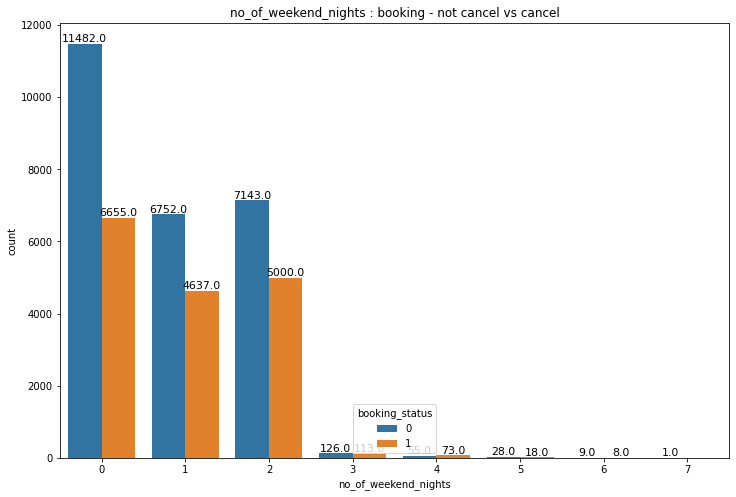

In [ ]:
plt.figure(figsize =(12,8))

ax = sns.countplot(data = df, x = 'no_of_weekend_nights', hue = 'booking_status')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, height, ha = 'center', size = 11)
plt.title('no_of_weekend_nights : booking - not cancel vs cancel')
plt.show()